In [1]:
install.packages("gdata", repos="http://cran.rstudio.com/") 
install.packages("lattice", repos="http://cran.rstudio.com/") 
install.packages("xlsx", repos="http://cran.rstudio.com/") 


Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'gdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tsankhe\AppData\Local\Temp\Rtmp8cmBej\downloaded_packages


Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tsankhe\AppData\Local\Temp\Rtmp8cmBej\downloaded_packages


Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'xlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tsankhe\AppData\Local\Temp\Rtmp8cmBej\downloaded_packages


In [2]:
library(gdata)
library(lattice)
library(xlsx)

Warning message:
"package 'gdata' was built under R version 3.3.3"gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
gdata: 
gdata: (To avoid display of this message in the future, please ensure
gdata: perl is installed and available on the executable search path.)
gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLX' (Excel 97-2004) files.

gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.

gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.

Attaching package: 'gdata'

The following object is masked from 'package:stats':

    nobs

The following object is masked from 'package:utils':

    object.size

The following object is ma

In [3]:
data<-read.xlsx("NHLTop100.xlsx",1)

In [4]:
head(data)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


### extract goal and assist data

In [18]:
goalAssist<-data[,c("G","A")]
head(goalAssist)

G,A
894,1963
694,1193
801,1049
549,1249
731,1040
692,1063


In [6]:
lm<-lm(goalAssist)
summary(lm)


Call:
lm(formula = goalAssist)

Residuals:
    Min      1Q  Median      3Q     Max 
-294.82  -83.50   10.12   88.54  284.69 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 321.08001   46.62860   6.886 5.52e-10 ***
A             0.20805    0.06033   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 130.9 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


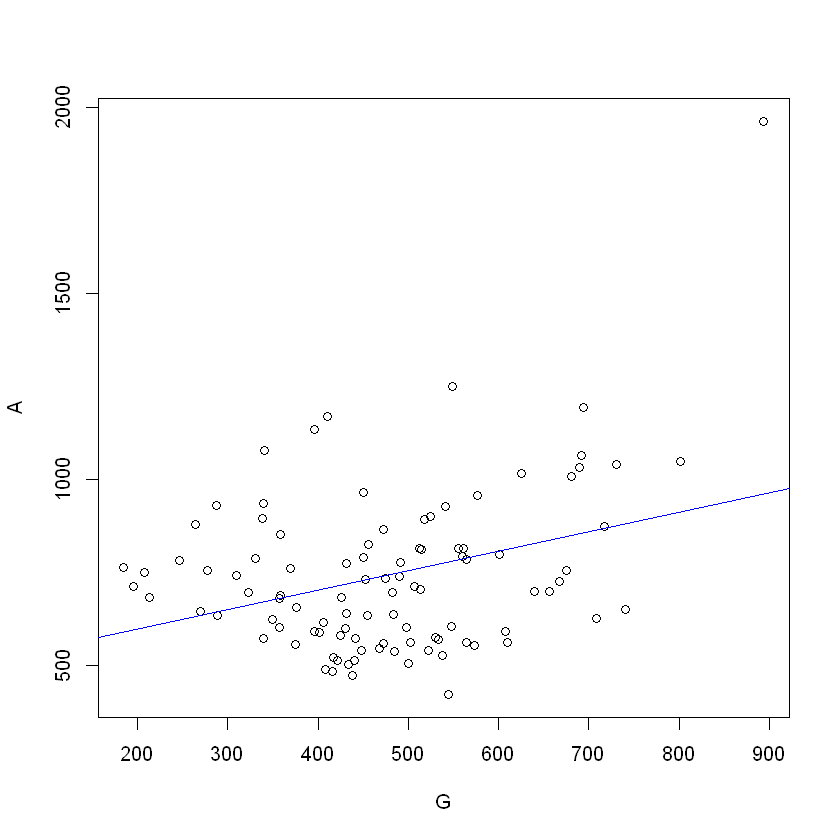

In [7]:


plot(goalAssist)
abline(lm(A~G, data=goalAssist),col="blue")

In [24]:
temp<-(lm(I(A-1963)~I(G-894), data=goalAssist))
wg<-(lm(I(A-coef(temp)[1])~I(G),data=goalAssist))
summary(wg)


Call:
lm(formula = I(A - coef(temp)[1]) ~ I(G), data = goalAssist)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1497.9356    74.6410  20.069  < 2e-16 ***
I(G)           0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


### Passing line through Gretsky and Kane
#### for this we make a new lm model with intercepts at the coordinates of the players. using the slope of this model as the new intercept we get the LM models for both players that has the same slope and passes through the respective coordinates.

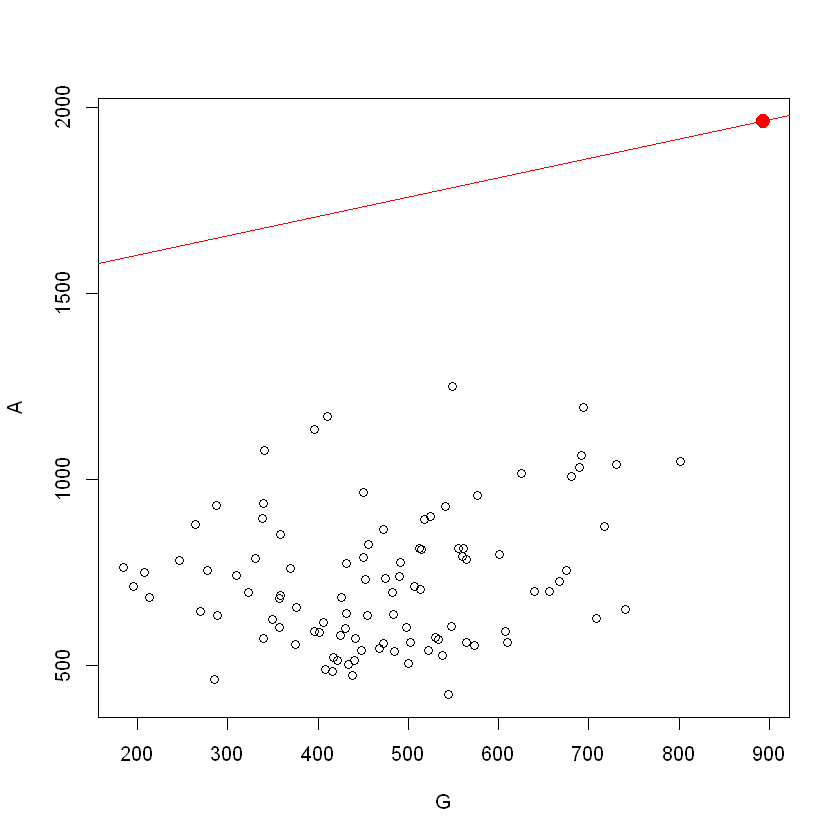

In [29]:
plot(goalAssist)
points(x=894,y=1963,pch=19, col="Red", cex=1.5)
abline(coef(wg)[1],coef(wg)[2],col="red")

### add data for Patrick Kane and repeat the above mentioned process

In [26]:
goalAssist[nrow(goalAssist) + 1, ] <- c( 285,462)

In [27]:
temp1<-(lm(I(A-462)~I(G-285), data=goalAssist))
pk<-(lm(I(A-coef(temp1)[1])~I(G),data=goalAssist))
summary(pk)


Call:
lm(formula = I(A - coef(temp1)[1]) ~ I(G), data = goalAssist)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.92  126.23  997.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 308.6821    73.5982   4.194 5.97e-05 ***
I(G)          0.5380     0.1492   3.605 0.000491 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.1071 
F-statistic:    13 on 1 and 99 DF,  p-value: 0.0004909


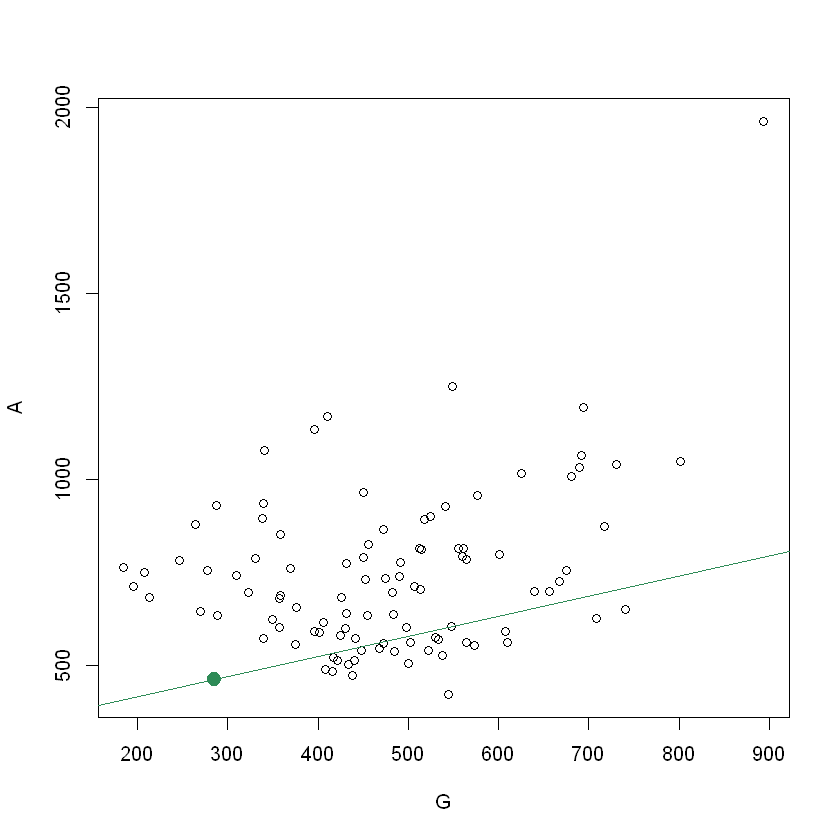

In [28]:
plot(goalAssist)
points(x=285,y=462,pch=19, col="seagreen4", cex=1.5)
abline(coef(pk)[1],coef(pk)[2],col="seagreen4")

### Force the LM model to pass through origin for all three models and plot abline using slope as 0

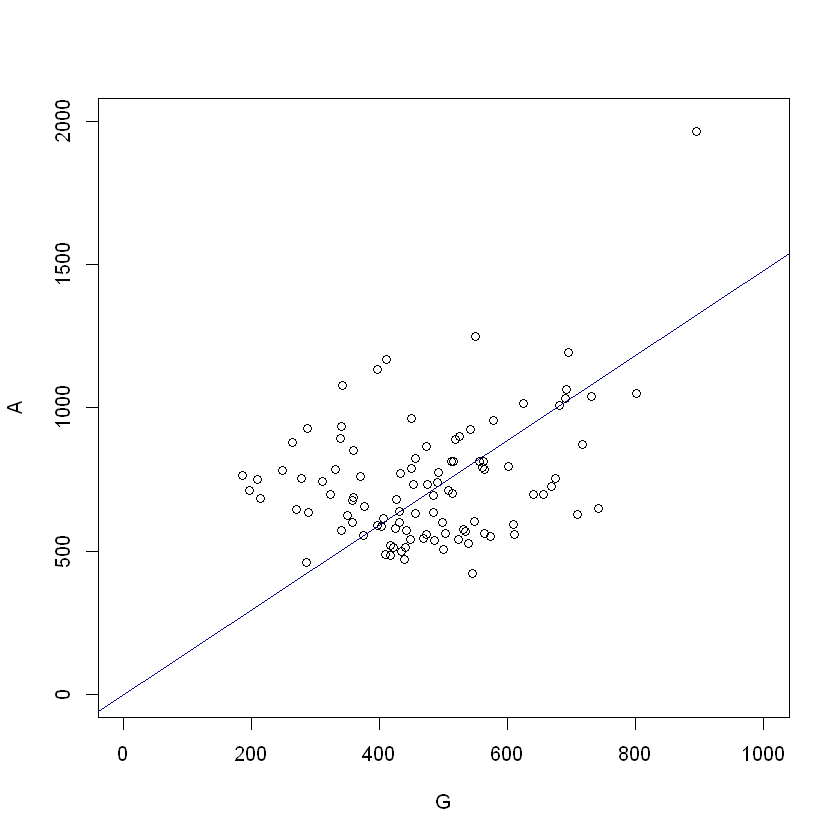

In [36]:
plot(goalAssist,ylim=c(0,2000), xlim=c(0,1000))
lm0<-lm(I(A)~I(G)+0, data=goalAssist)
abline(lm0,col="dark blue")


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = goalAssist)

Residuals:
   Min     1Q Median     3Q    Max 
-902.9 -329.7 -141.1  121.9  700.5 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)  2.68054    0.08412   31.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 374.1 on 100 degrees of freedom
Multiple R-squared:  0.9103,	Adjusted R-squared:  0.9094 
F-statistic:  1015 on 1 and 100 DF,  p-value: < 2.2e-16


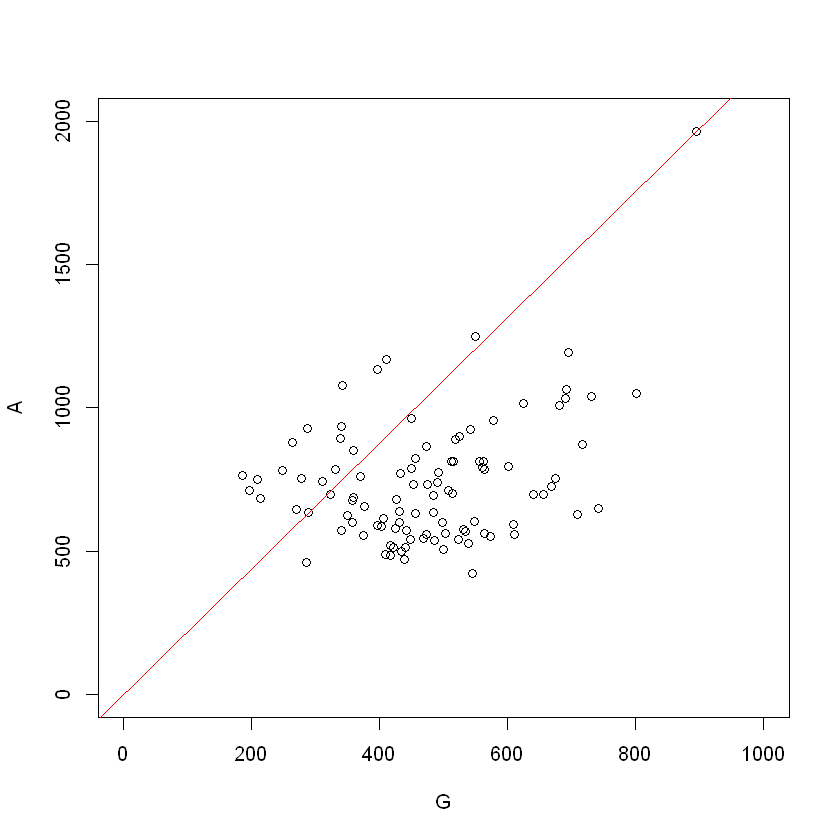

In [37]:
origin_wayne<-lm(I(A-1963)~I(G-894)+0, data=goalAssist)
summary(origin_wayne)
plot(goalAssist,ylim=c(0,2000), xlim=c(0,1000))
abline(0,1963/894,col="red")

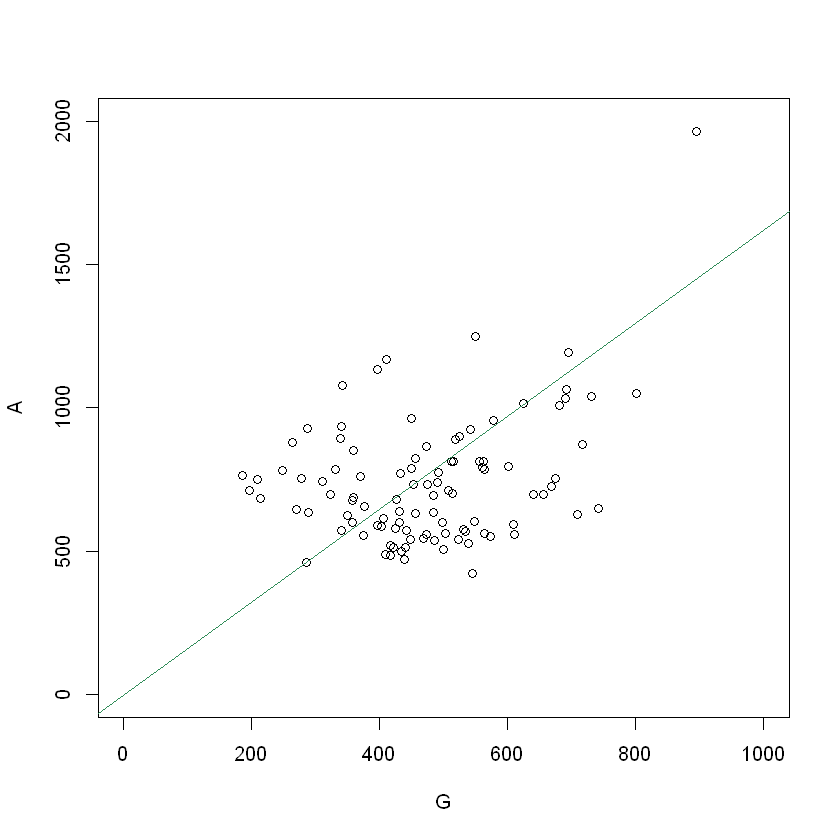

In [42]:
origin_patrik<-lm(I(A-462)~I(G-285)+0, data=goalAssist)
plot(goalAssist,ylim=c(0,2000), xlim=c(0,1000))
abline(0,462/285,col="sea green")

In [44]:
summary(lm0)
summary(origin_wayne)
summary(origin_patrik)



Call:
lm(formula = I(A) ~ I(G) + 0, data = goalAssist)

Residuals:
   Min     1Q Median     3Q    Max 
-447.3 -137.1    3.6  157.9  639.2 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
I(G)  1.48080    0.04976   29.76   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 246.7 on 100 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8975 
F-statistic: 885.4 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = goalAssist)

Residuals:
   Min     1Q Median     3Q    Max 
-902.9 -329.7 -141.1  121.9  700.5 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)  2.68054    0.08412   31.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 374.1 on 100 degrees of freedom
Multiple R-squared:  0.9103,	Adjusted R-squared:  0.9094 
F-statistic:  1015 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(A - 462) ~ I(G - 285) + 0, data = goalAssist)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.54 -112.83   40.72  167.42  803.74 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 285)  1.14493    0.09825   11.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.6 on 100 degrees of freedom
Multiple R-squared:  0.5759,	Adjusted R-squared:  0.5717 
F-statistic: 135.8 on 1 and 100 DF,  p-value: < 2.2e-16


In [52]:
models = c("Initial fit", "Wayne gretzky","Patrick kane", "Passing through origin","Passing through origin gretzky","Passing through origin Kane")
r_squared_value = c("0.1082","0.1082", "0.116", "0.8985","0.9103","0.5759")
p_value = c("0.0008317", "0.0008317", "0.0004909", "2.2e-16","2.2e-16","2.2e-16")

analysis = data.frame(models, r_squared_value, p_value)
analysis


models,r_squared_value,p_value
Initial fit,0.1082,0.0008317
Wayne gretzky,0.1082,0.0008317
Patrick kane,0.116,0.0004909
Passing through origin,0.8985,2.2e-16
Passing through origin gretzky,0.9103,2.2e-16
Passing through origin Kane,0.5759,2.2e-16


## Interpretation:
### The R-squared statistic provides a measure of how well the model is fitting the actual data.
###  From above we can see, R-squared value for the intial fit is less. But when we force the regression line through origin it increases
### A small p-value indicates that it is unlikely we will observe a relationship between the predictor and response (Goals and Assist) variables due to chance.
### As we can see the p-value decreases as we force the models through origin suggesting better fit.

## Reference
### http://www.statmethods.net/stats/regression.html
